# HIV Modell
Du hast die Differenzialgleichungen für das HIV-Modell bereits aufgestellt. Jetzt kannst du diese implementieren, in python lösen und für bestimmte Parameter plotten.


In [1]:
# Module importieren
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

**Aufgabe 1**: Implementiere das HIV-Modell

In [21]:
def HIV(x,t,params):
    # Definiere die Spezies
    T=x[0]
    I=x[1]
    V=x[2]
    # Definiere die Parameter
    a,b,c,d,e,f= params
    # Definiere die Differenzialgleichungen
    dT=lamda_T-d_T*T-beta*T*V
    dI=-d_I*I+beta*T*V
    dV=-cl*V+k*I
    
    dH=[dT,dI,dV]

    return dH

Du benötigst nun noch die passenden Parameter und Anfangswerte für das HIV-Modell. Wir benutzen die Parameter und Anfangswerte aus der Publikation "Insight into treatment of HIV infection from viral dynamics models" von Hill AL et al. veröffentlicht 2018 in dem Journal Immunological Reviews (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6155466/).

**Aufgabe 2**: Welche Einheiten haben die Paramter?

In [22]:
# Parameter aus Hill AL et al. 2018 Immunol Rev

# Produktion der gesunden T-Zellen
lamda_T = 100

# Infektion
beta = 0.0003

# Natürliche Todesratenkonstante der gesunden T-Zellen
d_T = 0.1

# Todesratenkonstante der infizierten T-Zellen
d_I = 1.0

# Virenproduktion
k = 250

# Virenabbau
cl = 25.0

params = [lamda_T,beta,d_T,d_I,k,cl]  # hier Parameter in passender Reihenfolge eintragen

# Anfangswerte
T0 = 1000
I0 = 0.001
V0 = 0
X0 = [T0,I0,V0]  # hier Anfangswerte der Spezies in passender Reihenfolge eintragen

**Aufgabe 3**: Suche dir geeignete Zeitschritte und Zeitraum für die Modellierung aus und löse das Differentialgleichungssystem mit Hilfe der Funktion odeint in Python.

In [23]:
# Zeitraum und Zeitschritte
T = np.arange(0,20.1,0.1)

# Integriere das Modell
X = odeint(HIV,X0,T,args=(params,))

**Aufgabe 4**: Plotte den zeitlichen Verlauf der gesunden und infizierten T-Zellen sowie der Viren.

Text(0.5, 0, 'Zeit t')

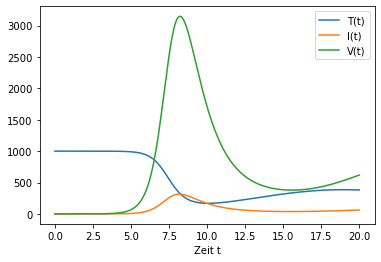

In [24]:
fig, ax = plt.subplots()
ax.plot(T, X[:, 0], label = 'T(t)')
ax.plot(T, X[:, 1], label = 'I(t)')
ax.plot(T, X[:, 2], label = 'V(t)')

ax.legend()
ax.set_xlabel('Zeit t')